# Linear Regression

**Import Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
final2 = pd.read_csv('finale2.csv', error_bad_lines=False, parse_dates=['date'], infer_datetime_format=True)

In [3]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 24 columns):
date                          689 non-null datetime64[ns]
trip_id                       689 non-null int64
max_temperature_f             689 non-null int64
mean_temperature_f            689 non-null float64
min_temperaturef              689 non-null int64
max_dew_point_f               689 non-null int64
meandew_point_f               689 non-null int64
min_dewpoint_f                689 non-null int64
max_humidity                  689 non-null int64
mean_humidity                 689 non-null int64
min_humidity                  689 non-null int64
max_sea_level_pressure_in     689 non-null float64
mean_sea_level_pressure_in    689 non-null float64
min_sea_level_pressure_in     689 non-null float64
max_visibility_miles          689 non-null int64
mean_visibility_miles         689 non-null int64
min_visibility_miles          689 non-null int64
max_wind_speed_mph            689 non-null in

In [4]:
# drop unimportant features
final2.drop(['max_temperature_f','min_temperaturef','max_dew_point_f','min_dewpoint_f','max_humidity'
             ,'min_humidity','max_sea_level_pressure_in', 'min_sea_level_pressure_in','max_visibility_miles',
            'min_visibility_miles','max_wind_speed_mph' ], axis = 1, inplace = True)

In [5]:
final2.head()

,date,trip_id,mean_temperature_f,meandew_point_f,mean_humidity,mean_sea_level_pressure_in,mean_visibility_miles,mean_wind_speed_mph,precipitation_in,events,month,day,weekday
0,2014-10-13,409,62.0,51,68,29.79,10,4,0.00,Rain,10,13,0.0
1,2014-10-14,491,59.0,51,78,29.75,9,5,0.11,Rain,10,14,0.0
2,2014-10-15,313,58.0,50,77,29.71,9,7,0.45,Rain,10,15,0.0
3,2014-10-16,395,61.0,46,61,29.95,10,4,0.00,Rain,10,16,0.0
4,2014-10-17,294,60.0,51,72,29.78,10,3,0.14,Rain,10,17,0.0


In [6]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 13 columns):
date                          689 non-null datetime64[ns]
trip_id                       689 non-null int64
mean_temperature_f            689 non-null float64
meandew_point_f               689 non-null int64
mean_humidity                 689 non-null int64
mean_sea_level_pressure_in    689 non-null float64
mean_visibility_miles         689 non-null int64
mean_wind_speed_mph           689 non-null int64
precipitation_in              689 non-null float64
events                        689 non-null object
month                         689 non-null int64
day                           689 non-null int64
weekday                       689 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 70.1+ KB


In [7]:
final2.loc[final2.events == 'Rain', 'events'] = "Rain"
final2.loc[final2.events.isnull(), 'events'] = "Normal"

In [8]:
# get dummies for events
pd.get_dummies(final2.events)
final2.join(pd.get_dummies(final2['events']))
final2.drop(['events'], axis = 1, inplace = True)

In [9]:
# change integers to float
cols = ['meandew_point_f','mean_humidity','mean_visibility_miles','mean_wind_speed_mph','month','day']
final2[cols] = final2[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [60]:
final2.to_csv('/Users/jorrikfulda/nf-ds/capstone/final_new.csv', index=False)

# Correlation

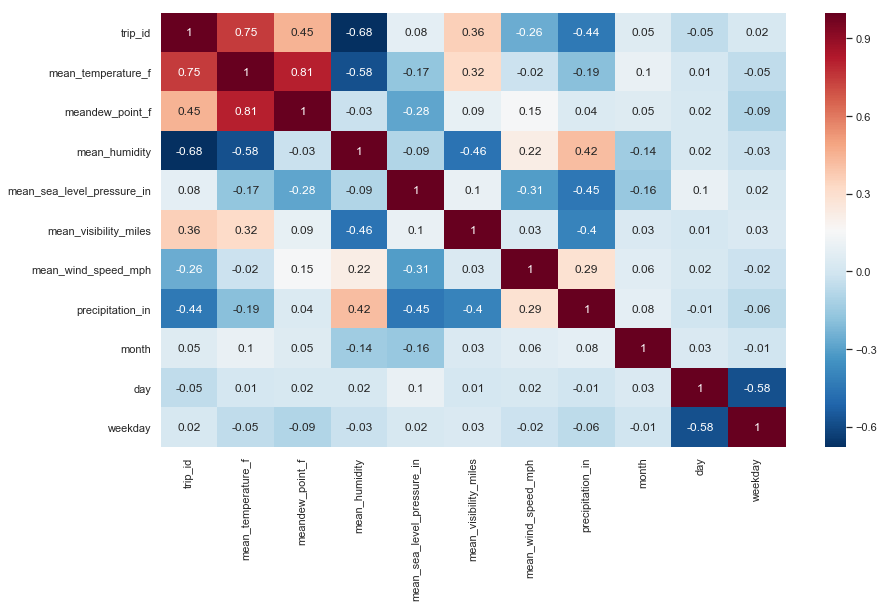

In [48]:
# annot = True to print the values inside the square
plt.figure(figsize=(14,8))
correlation_matrix = final2.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, cmap='RdBu_r')

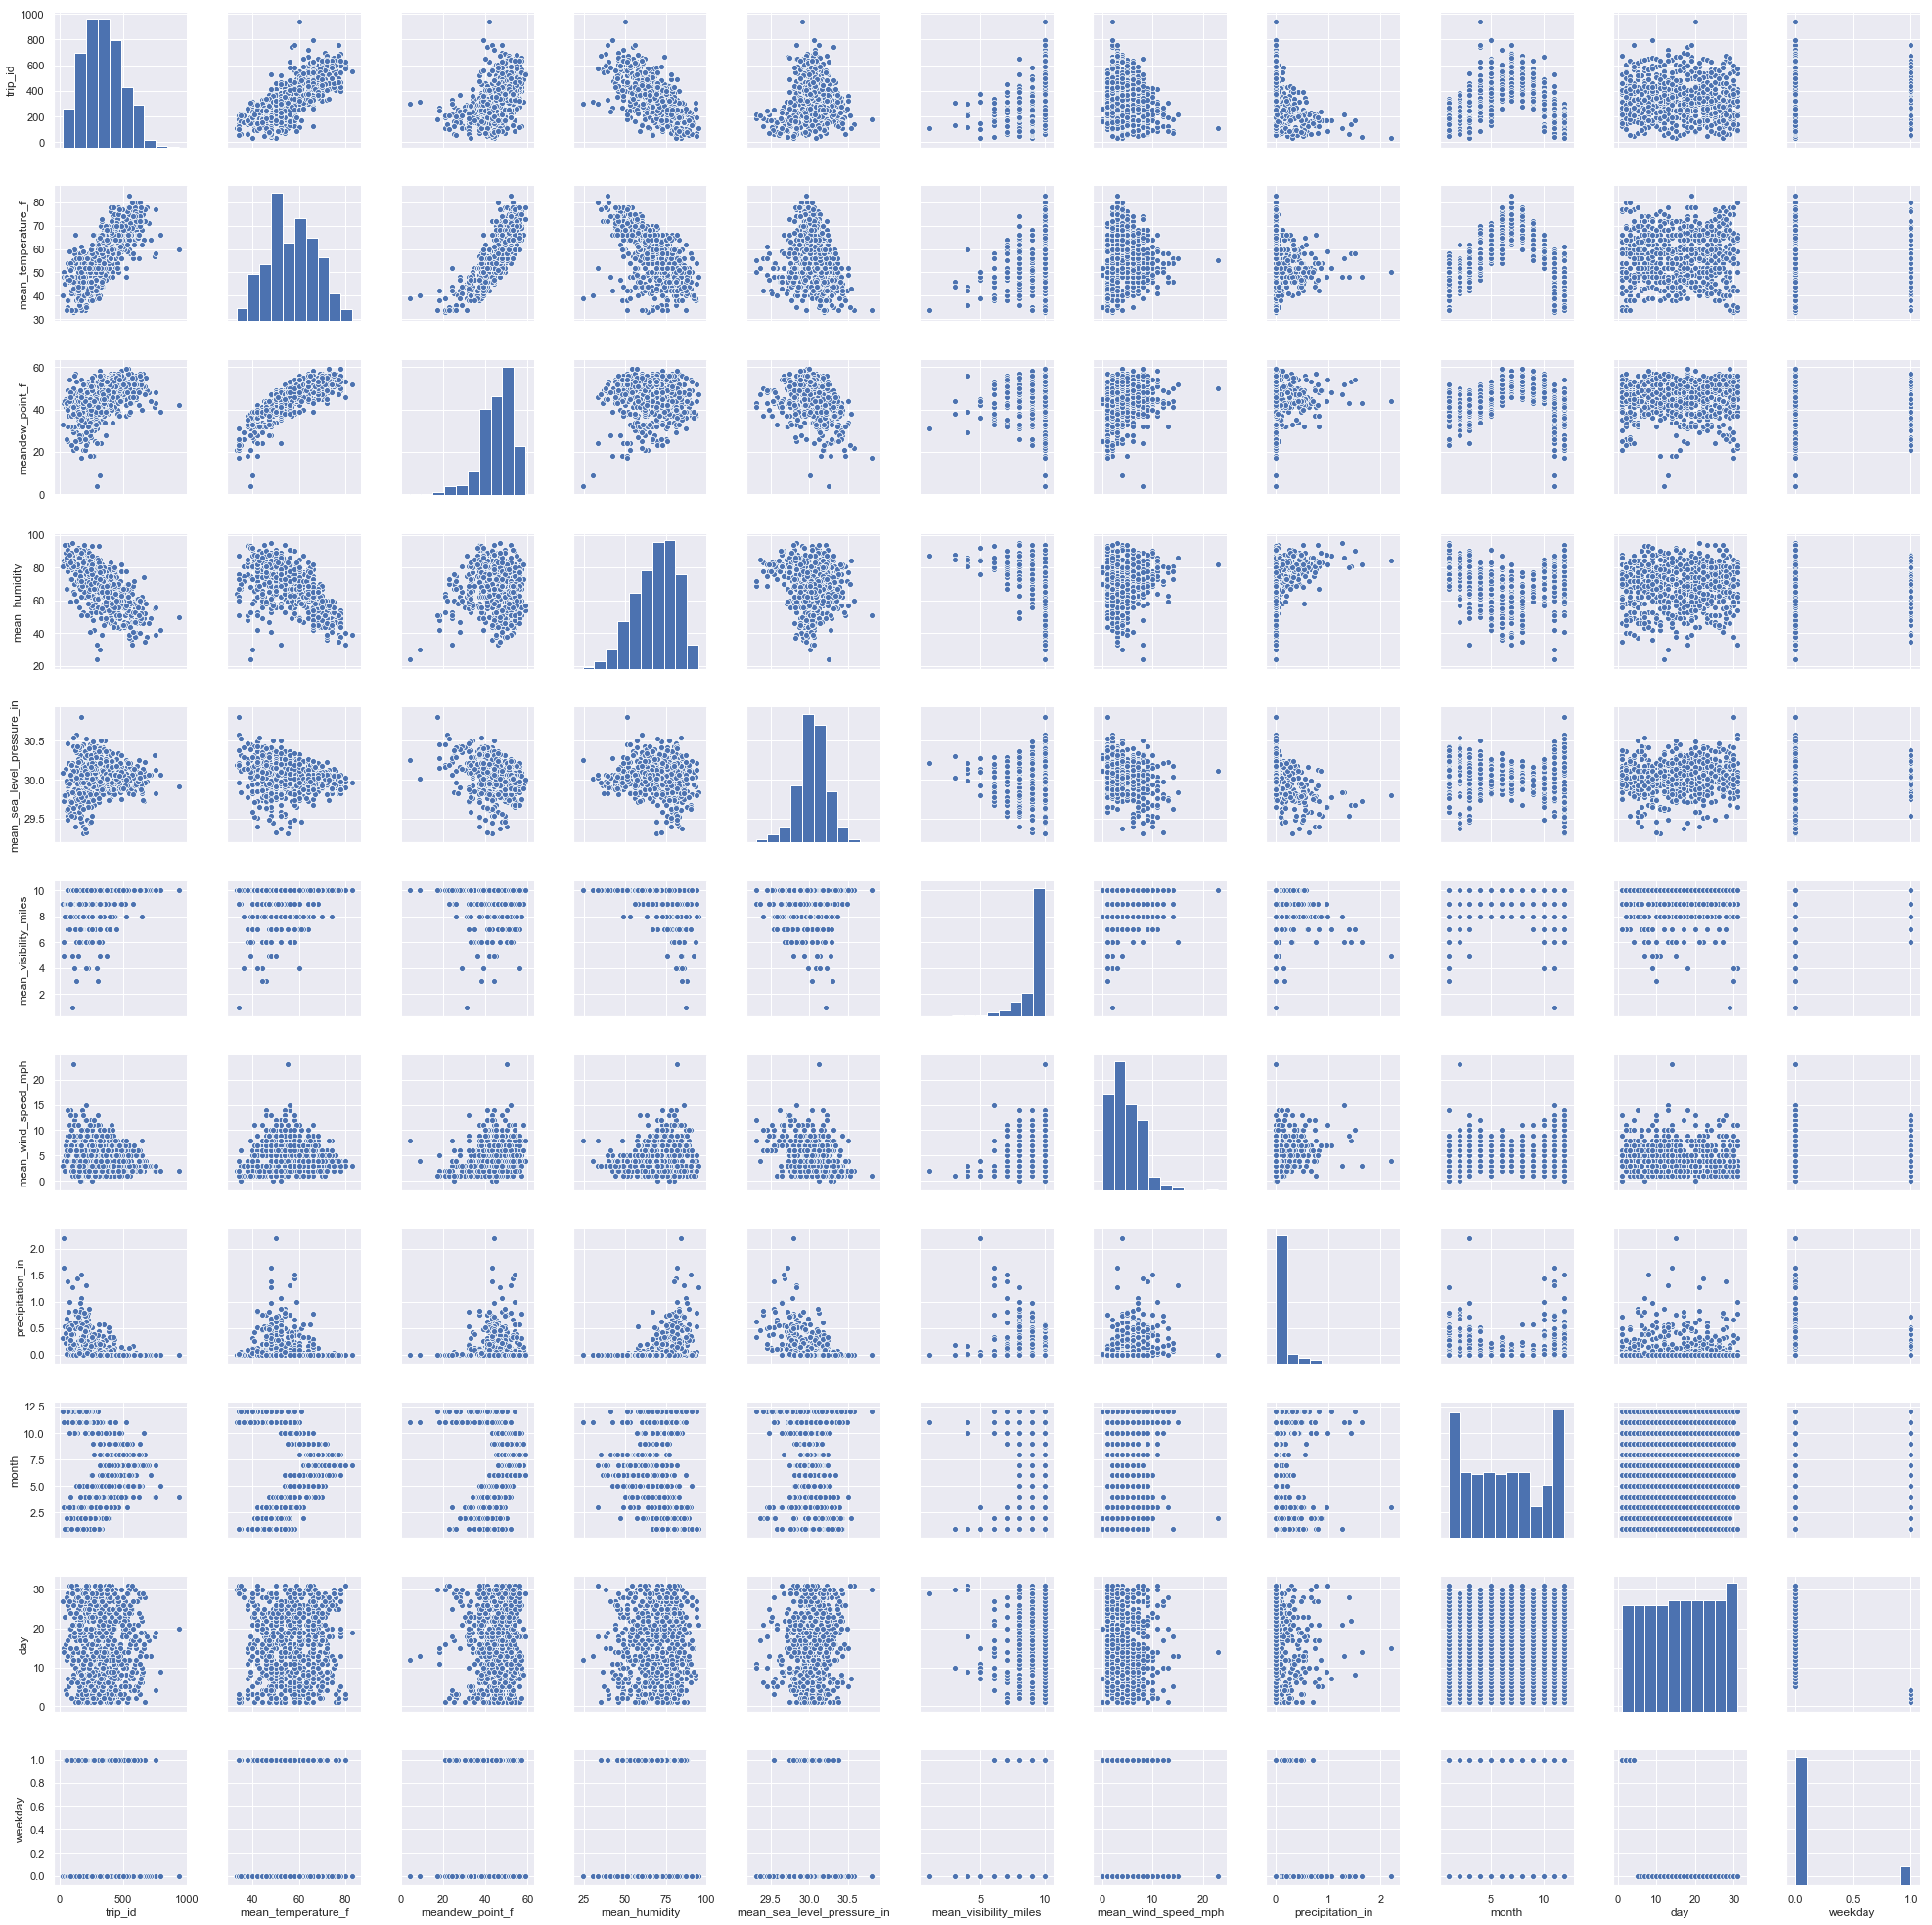

In [24]:
sb.set()
sb.pairplot(final2);

In [49]:
final2.corr()['trip_id'].sort_values(ascending=False)

trip_id                       1.000000
mean_temperature_f            0.748636
meandew_point_f               0.451521
mean_visibility_miles         0.364064
mean_sea_level_pressure_in    0.078673
month                         0.051527
weekday                       0.020099
day                          -0.047439
mean_wind_speed_mph          -0.263628
precipitation_in             -0.439759
mean_humidity                -0.679608
Name: trip_id, dtype: float64

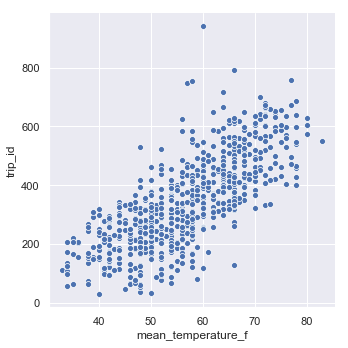

In [29]:
sb.relplot(x='mean_temperature_f', y='trip_id', data=final2)

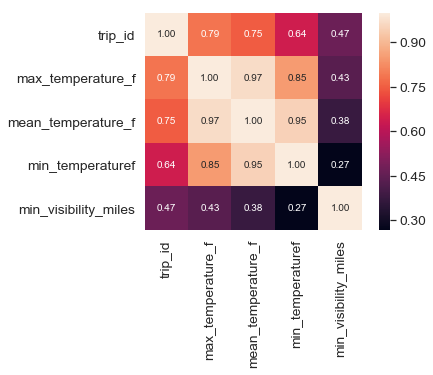

In [7]:
corrmat = final2.corr()
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'trip_id')['trip_id'].index
cm = np.corrcoef(final2[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [59]:
abs(final2.corr()) > 0.8

,trip_id,mean_temperature_f,meandew_point_f,mean_humidity,mean_sea_level_pressure_in,mean_visibility_miles,mean_wind_speed_mph,precipitation_in,month,day,weekday
trip_id,True,False,False,False,False,False,False,False,False,False,False
mean_temperature_f,False,True,True,False,False,False,False,False,False,False,False
meandew_point_f,False,True,True,False,False,False,False,False,False,False,False
mean_humidity,False,False,False,True,False,False,False,False,False,False,False
mean_sea_level_pressure_in,False,False,False,False,True,False,False,False,False,False,False
mean_visibility_miles,False,False,False,False,False,True,False,False,False,False,False
mean_wind_speed_mph,False,False,False,False,False,False,True,False,False,False,False
precipitation_in,False,False,False,False,False,False,False,True,False,False,False
month,False,False,False,False,False,False,False,False,True,False,False
day,False,False,False,False,False,False,False,False,False,True,False


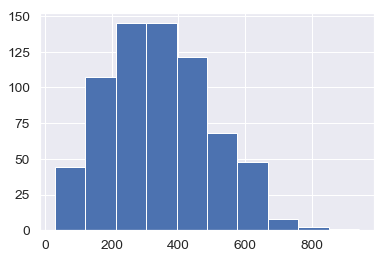

In [9]:
final2.trip_id.hist()

In [11]:
print("Skewness: %f" % final2['trip_id'].skew())
print("Kurtosis: %f" % final2['trip_id'].kurt())

Skewness: 0.363176
Kurtosis: -0.268196


# Categorical variables

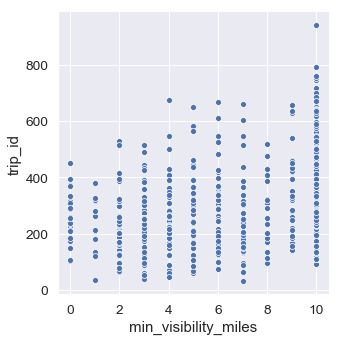

In [13]:
sb.relplot(x='mean_visibility_miles', y='trip_id', data=final2) # categorical?

# Predictive Model

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [11]:
X = final2.drop(['trip_id', 'date'], axis=1)
y = final2[['trip_id']]

In [12]:
# scaling
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

In [13]:
# Crossvalidate the model
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.46810488  0.21099119  0.26272464 -0.3585917   0.43291013  0.63157611
  0.10119246  0.5470273  -0.50077714 -1.46085096]
Average cross-validation score: 0.03


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(551, 10)
(138, 10)
(551, 1)
(138, 1)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# model evaluation for training set
# get Root Mean Square Error RMSE an R2
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 80.7633409159193
R2 score is 0.7284268489547436


The model performance for testing set
--------------------------------------
RMSE is 89.41605907436013
R2 score is 0.6612654562195436


In [17]:
import statsmodels.api as sms

In [18]:
import statsmodels.formula.api as smf
model = 'trip_id ~ mean_temperature_f  + precipitation_in + mean_humidity + C(day)'
smf.ols(formula = model, data = final2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                trip_id   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     384.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          3.23e-173
Time:                        22:15:43   Log-Likelihood:                -4045.7
No. Observations:                 689   AIC:                             8101.
Df Residuals:                     684   BIC:                             8124.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            124.7778     40.477      3.083      0.002      45.303     204.252
mean_temperature_f     8.2229      0.391     21.057      0.000       7.456       8.990
precipitation_in    -146.6058     15.407     -9.515      0.000    -176.857    -116.354
mean_humidity         -3.1923      0.346     -9.233      0.000      -3.871      -2.513
day                   -0.8399      0.374     -2.246      0.025      -1.574      -0.106
==============================================================================
Omnibus:                       61.130   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.728
Skew:                           0.472   Prob(JB):                     6.85e-34
Kurtosis:                       5.104   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


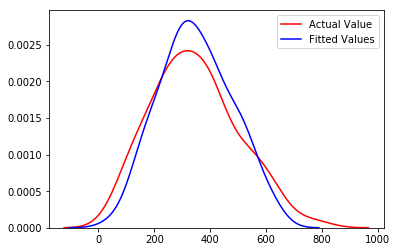

In [26]:
import seaborn as sns

ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predict, hist=False, color="b", label="Predicted Values" , ax=ax1)

# Conclusion

Despite having highly correlated independent variables the R2-Score is not better than 0.69